This Notebook shows how to optimise the pruning parameters of your network based on pairwise connectivity data.

First we need to create a small network that we can use for the optimisation of the pruning parameters.

In this example we do not need to have realistic neuron densities, so we will place the neurons in a cube of diameter 100 micrometers.

In [1]:
import os

n_neurons = 120
# pop_size = 10
# epochs = 10

pre_type = "iSPN"
post_type = "iSPN"
con_type = "GABA"

network_path = os.path.join("networks", f"{pre_type}_to_{post_type}_f1_mu2")

SPN2SPNdistDepPruning = "1-exp(-(0.4*d/60e-6)**2)"
extra_pruning_parameters = { 'distPruning': SPN2SPNdistDepPruning }

all_experimental_data = {}
all_experimental_data["dSPN", "iSPN"] = [(0, 50e-6, 3/47.0), (0, 100e-6, 3/66.0)]
all_experimental_data["dSPN", "dSPN"] = [(0, 50e-6, 5/19.0), (0, 100e-6, 3/43.0)]
all_experimental_data["iSPN", "iSPN"] = [(0, 50e-6, 14/39.0), (0, 100e-6, 7/31.0)]
all_experimental_data["iSPN", "dSPN"] = [(0, 50e-6, 13/47.0), (0, 100e-6, 10/80.0)]
all_experimental_data["FS", "FS"] = [(0, 250e-6, 7/12.0)]
all_experimental_data["FS", "iSPN"] = [(0, 100e-6, 6/9.0), (0, 150e-6, 21/54.0), (0, 250e-6, 27/77.0)]
all_experimental_data["FS", "dSPN"] = [(0, 100e-6, 8/9.0), (0, 150e-6, 29/48.0), (0, 250e-6, 48/90.0)]

experimental_data = all_experimental_data[pre_type, post_type]
avg_num_synapses_per_pair = 3  # Expected mean, error weight

In [2]:
from snudda.place.create_cube_mesh import create_cube_mesh

mesh_file = os.path.join(network_path, "cube-mesh.obj")
create_cube_mesh(mesh_file, [0,0,0], 150e-6)

from snudda.init import SnuddaInit
si = SnuddaInit(network_path=network_path, random_seed=123, snudda_data="../../../../BasalGangliaData/data/")

si.define_structure(struct_name="Cube", struct_mesh=mesh_file, d_min=12e-6, mesh_bin_width=25e-6)

if pre_type == post_type:
    si.add_neurons(name=pre_type, num_neurons=n_neurons, volume_id="Cube",
                    neuron_dir=os.path.join("$DATA","neurons","striatum","dspn"))
else:
    si.add_neurons(name=pre_type, num_neurons=int(n_neurons/2), volume_id="Cube",
                    neuron_dir=os.path.join("$DATA","neurons","striatum","dspn"))
    si.add_neurons(name=post_type, num_neurons=int(n_neurons/2), volume_id="Cube",
                    neuron_dir=os.path.join("$DATA","neurons","striatum","dspn"))
    

# The parameters here does not matter, they will be set during optimisation
si.add_neuron_target(neuron_name=pre_type,
                     target_name=post_type,
                     connection_type=con_type,
                     dist_pruning=SPN2SPNdistDepPruning,
                     f1=None, soft_max=None, mu2=None,
                     a3=None,
                     conductance=[0.24e-9, 0.1e-9],
                     mod_file="tmGabaA")

si.write_json()

Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Writing networks/iSPN_to_iSPN_f1_mu2/network-config.json


In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False)
sp.place()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/iSPN_to_iSPN_f1_mu2/network-config.json


Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/iSPN_to_iSPN_f1_mu2/network-config.json


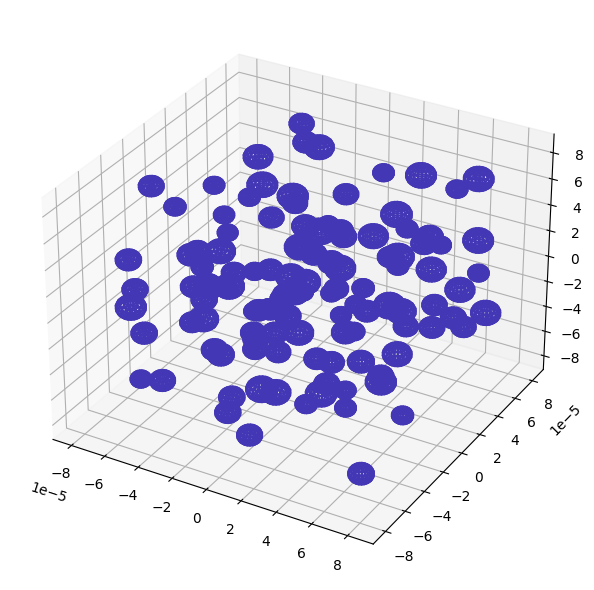

In [4]:
from snudda.plotting import PlotNetwork
network_file = os.path.join(network_path, "network-neuron-positions.hdf5")
pn = PlotNetwork(network_file)
pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False)
pn.close() 

In [5]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, hyper_voxel_size=100)
sd.detect()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/iSPN_to_iSPN_f1_mu2/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 32/125 (120 neurons)
Processing hyper voxel : 31/125 (120 neurons)
Processing hyper voxel : 36/125 (119 neurons)
Processing hyper voxel : 37/125 (110 neurons)
Processing hyper voxel : 56/125 (97 neurons)
Processing hyper voxel : 61/125 (76 neurons)
Processing hyper voxel : 57/125 (75 neurons)
Processing hyper voxel : 6/125 (71 neurons)
Processing hyper voxel : 62/125 (69 neurons)
Processing hyper voxel : 11/125 (60 neurons)
Processing hyper voxel : 7/125 (56 neurons)
Processing hyper voxel : 12/125 (47 neurons)
Processing hyper voxel : 30/125 (33 neurons)
Processing hyper voxel : 26/125 (32 neurons)
Processing hyper voxel : 35/125 (29 neurons)
Processing hyper voxel : 27/125 (22 neurons)
Processing hyper voxel : 51/125 (16 neurons)
Processing hyper voxel : 41/125 (14 neurons)
Processing hyper voxe

In [6]:
from snudda.optimise.optimise_pruning import OptimisePruning
op = OptimisePruning(network_path=network_path)

In [7]:
op.merge_putative_synapses(force_merge=True)

Read 181177 out of total 181177 synapses


In [8]:
op.prune.connectivity_distributions

{(1,
  1,
  10): (OrderedDict([('f1', 1.0),
               ('softMax', None),
               ('mu2', None),
               ('a3', None),
               ('distPruning', '1-exp(-(0.4*d/60e-6)**2)'),
               ('cluster', False)]), None)}

In [9]:
op.prune.type_id_lookup

{'iSPN': 1}

In [10]:
op.prune.hist_file["meta/connectivityDistributions"][()]

b'{"iSPN$$iSPN": {"GABA": {"conductance": [2.4e-10, 1e-10], "channelParameters": {"modFile": "tmGabaA"}, "clusterSize": 1, "clusterSpread": null, "pruning": {"f1": null, "softMax": null, "mu2": null, "a3": null, "distPruning": "1-exp(-(0.4*d/60e-6)**2)", "cluster": false}, "channelModelID": 10, "lognormal_mu_sigma": [-22.230424900260093, 0.40010675493807013]}}}'

In [11]:
res = op.optimize(pre_type=pre_type, post_type=post_type, con_type=con_type, 
                  experimental_data=experimental_data, 
                  avg_num_synapses_per_pair=avg_num_synapses_per_pair,
                  extra_pruning_parameters=extra_pruning_parameters, 
                  workers=8, maxiter=1000, tol=0.0001, num_params=2)

/home/hjorth/HBP/Snudda/venv/lib/python3.9/site-packages/scipy/optimize/_differentialevolution.py:377: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


Worker iter: 100, fitness 7.247868716066576
Worker iter: 100, fitness 7.264640280445932
Worker iter: 100, fitness 7.2963210820161475
Worker iter: 100, fitness 7.296622240741868
Worker iter: 100, fitness 7.266409896895407
Worker iter: 100, fitness 7.277959457270516
Worker iter: 100, fitness 7.248094342838604
Worker iter: 100, fitness 7.262123053897869
Worker iter: 200, fitness 7.214771797592247
Duration: 191.2963746480018 s


# Best parameter set

In [14]:
print(f"f1 = %f, mu2 = %f" % (res.x[0], res.x[1]))

f1 = 0.350101, mu2 = 2.658987


In [15]:
res

     fun: 7.214771797592247
 message: 'Optimization terminated successfully.'
    nfev: 1563
     nit: 51
 success: True
       x: array([0.35010115, 2.65898657])

In [16]:
import os
from snudda.analyse.analyse import SnuddaAnalyse
import glob

# Get the last file
# list_of_files = glob.glob(os.path.join(network_path, "temp", "network-synapses-*hdf5"))
# network_file = max(list_of_files, key=os.path.getctime)

network_file = os.path.join(network_path, "network-synapses.hdf5")

dist3D = False
y_max_H = None

sa = SnuddaAnalyse(network_file)

Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Creating figures directory networks/iSPN_to_iSPN_f1_mu2/temp/figures
Number of neurons: 120
Synapse row 0 - 0.0 % time: 0.0015887010013102554 seconds
Created connection matrix 0.01454877300420776 seconds
Created gap junction connection matrix 0.0004027169998153113 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
n_synapses = 13127, at 0
Created distance histogram (optimised) in 0.013054739996732678 seconds
Saving cache to networks/iSPN_to_iSPN_f1_mu2/temp/network-synapses-5e641bd7-8961-4b3d-b1e1-71f4de2cad63.hdf5-cache


In [17]:
sa.plot_connection_probability("dSPN", "iSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(3, 47), (3, 66)])

Missing dSPN or iSPN in network, skipping plot with their connectivity


In [18]:
sa.plot_connection_probability("dSPN", "dSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(5, 19), (3, 43)])

Missing dSPN or dSPN in network, skipping plot with their connectivity


Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 120/120
Counting connections


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [14280.]
P(d<5e-05) = 0.3604255319148936
P(d<0.0001) = 0.26649545634136707


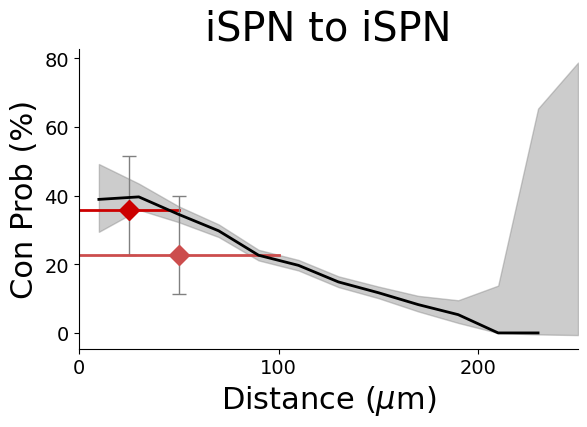

Wrote networks/iSPN_to_iSPN_f1_mu2/temp/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-3D-dist.pdf


({5e-05: 0.3604255319148936, 0.0001: 0.26649545634136707},
 'networks/iSPN_to_iSPN_f1_mu2/temp/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-3D-dist.pdf')

In [19]:
sa.plot_connection_probability("iSPN", "iSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(14, 39), (7, 31)])

In [20]:
sa.plot_connection_probability("iSPN", "dSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(13, 47), (10, 80)])

Missing iSPN or dSPN in network, skipping plot with their connectivity


In [ ]:
sa.plot_connection_probability("FS", "FS", dist_3d=True, exp_max_dist=[250e-6], exp_data_detailed=[(7, 12)])

In [ ]:
sa.plot_connection_probability("FS", "iSPN", dist_3d=True, exp_max_dist=[100e-6, 150e-6, 250e-6], exp_data_detailed=[(6, 9), (21, 54), (27,77)])

In [ ]:
sa.plot_connection_probability("FS", "dSPN", dist_3d=True, exp_max_dist=[100e-6, 150e-6, 250e-6], exp_data_detailed=[(8, 9), (29, 48), (48,90)])

In [21]:
sa.plot_num_synapses_per_pair("dSPN", "iSPN")

Plotting number of connections
plotNumSynapsesPerPair: dSPN is not in the simulation


In [22]:
sa.plot_num_synapses_per_pair("dSPN", "dSPN")

Plotting number of connections
plotNumSynapsesPerPair: dSPN is not in the simulation


Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 120/120
Calculating max synapses
Calculating mean synapses
Plotting 3212 connections


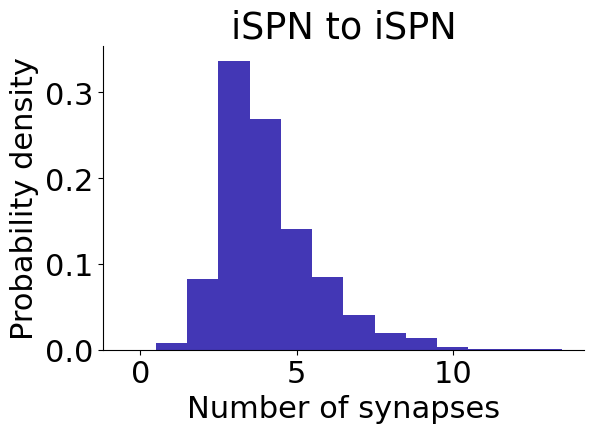

Wrote networks/iSPN_to_iSPN_f1_mu2/temp/figures/Network-number-of-synapses-from-iSPN-to-iSPN-per-cell.pdf


In [23]:
sa.plot_num_synapses_per_pair("iSPN", "iSPN")

In [24]:
sa.plot_num_synapses_per_pair("dSPN", "dSPN")

Plotting number of connections
plotNumSynapsesPerPair: dSPN is not in the simulation


In [ ]:
sa.plot_num_synapses_per_pair("FS", "FS")

In [ ]:
sa.plot_num_synapses_per_pair("FS", "iSPN")

In [ ]:
sa.plot_num_synapses_per_pair("FS", "dSPN")